
# Heart Failure Prediction



## About Dataset

### Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### Attribute Information
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

### Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations
- Total: 1190 observations
- Duplicated: 272 observations

- Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

### Citation
fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

### Acknowledgements
Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
Donor:
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779




In [64]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import plotly.express as px

%matplotlib inline 

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.shape

(918, 12)

In [8]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Axes: xlabel='Age', ylabel='Count'>

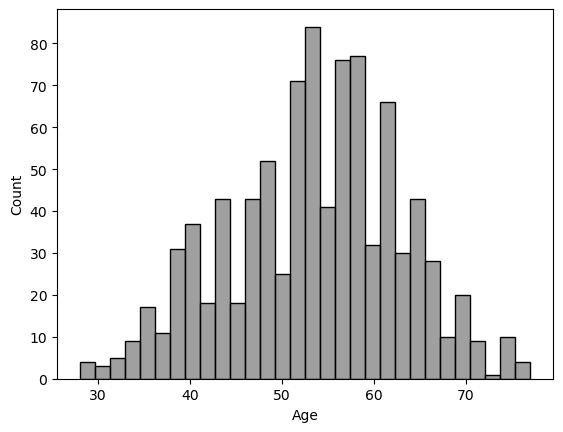

In [93]:
sns.histplot(df, x= df["Age"],color="grey",bins= 30)


In [94]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

<Axes: xlabel='Age', ylabel='count'>

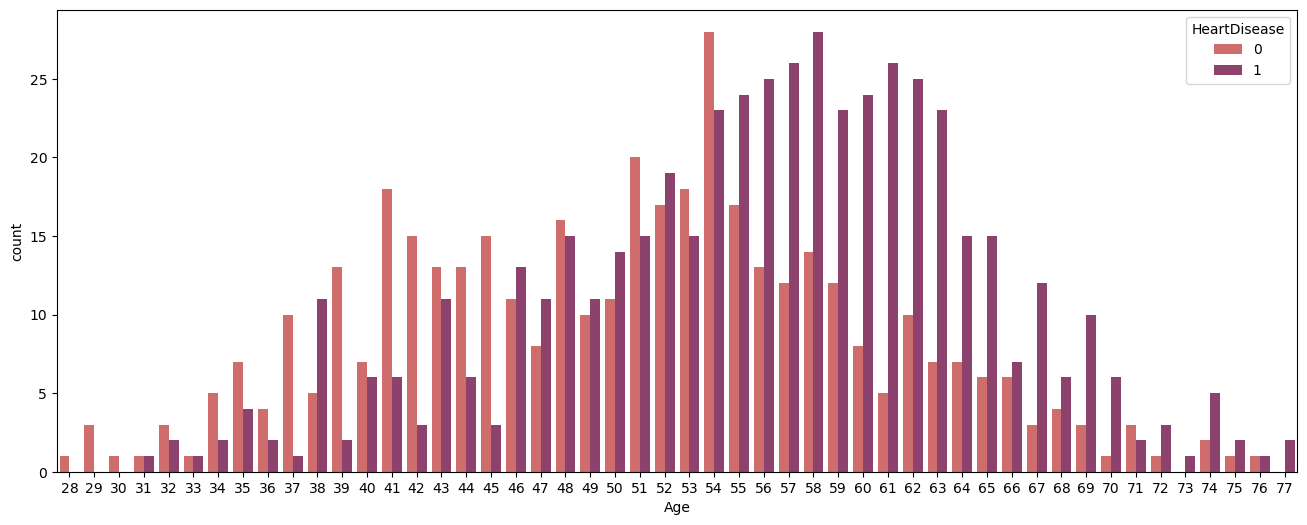

In [92]:
plt.figure(figsize=(16,6))
sns.countplot(df, x= df["Age"],hue=df["HeartDisease"],palette="flare")

<Axes: xlabel='RestingBP', ylabel='count'>

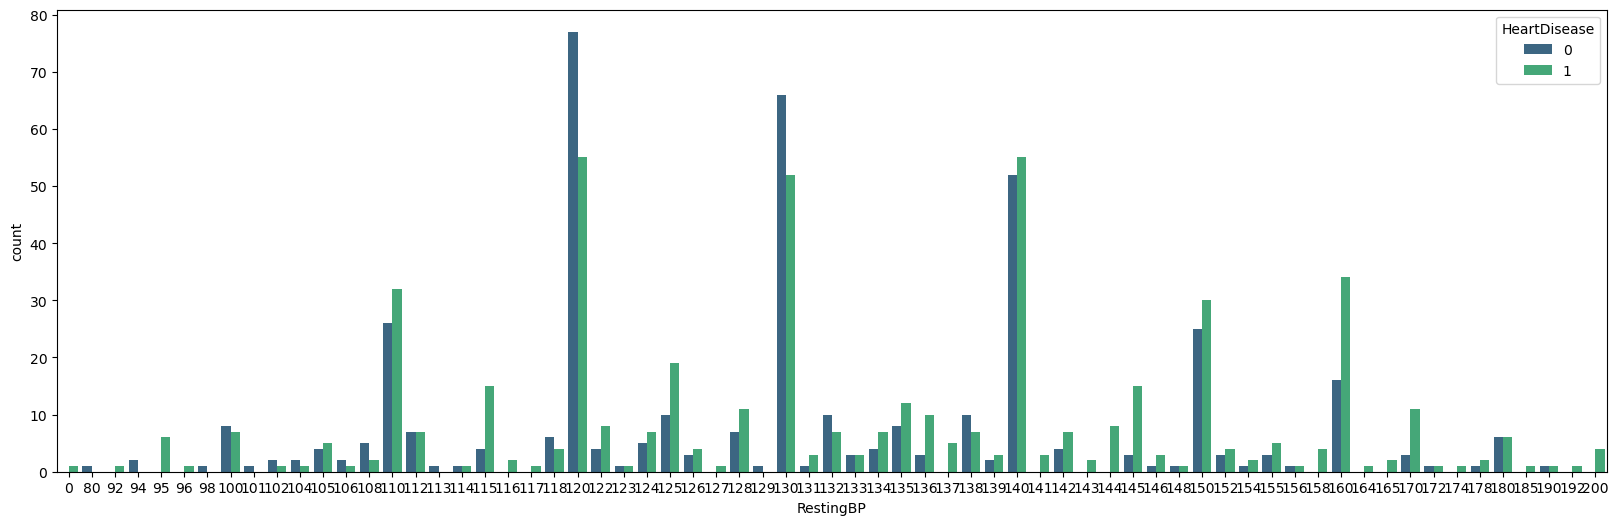

In [97]:
plt.figure(figsize=(20,6))
sns.countplot(df, x= df["RestingBP"],hue=df["HeartDisease"],palette="viridis")

In [86]:
df["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

<Axes: xlabel='ChestPainType', ylabel='count'>

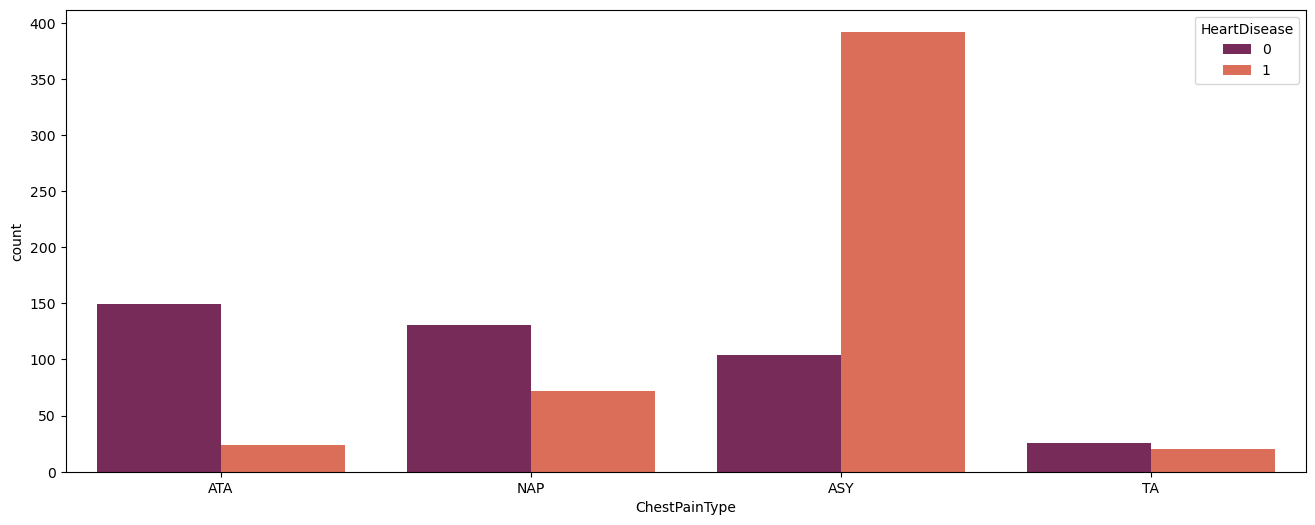

In [83]:
plt.figure(figsize=(16,6))
sns.countplot(df, x=df["ChestPainType"],hue=df["HeartDisease"],palette="rocket")

<Axes: xlabel='Sex', ylabel='count'>

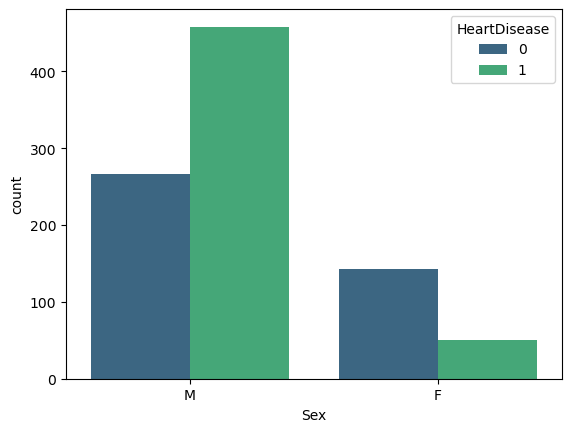

In [84]:
sns.countplot(df,x=df["Sex"],hue=df["HeartDisease"],palette="viridis")

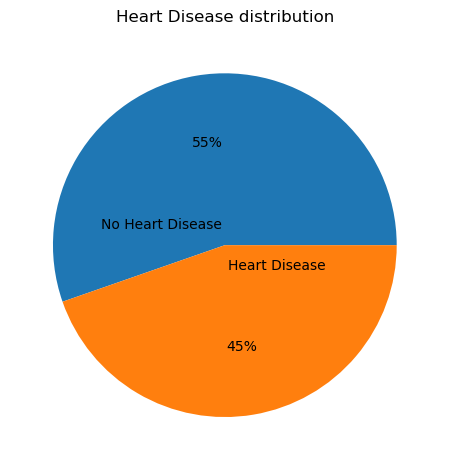

In [49]:

plt.pie(x=df["HeartDisease"].value_counts(),
        autopct='%.0f%%',
        labels=["No Heart Disease","Heart Disease"],
        colors=
    
        ,
        labeldistance = 0.12)
plt.title("Heart Disease distribution")
plt.tight_layout()

<Axes: xlabel='HeartDisease', ylabel='count'>

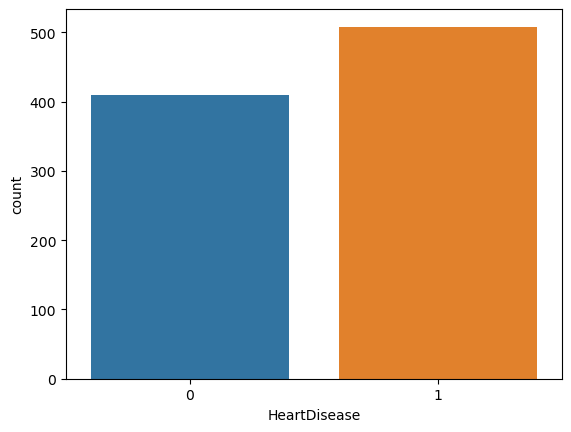

In [48]:
sns.countplot(df,x=df["HeartDisease"])

In [50]:

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [88]:
df["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

<Axes: xlabel='RestingECG', ylabel='count'>

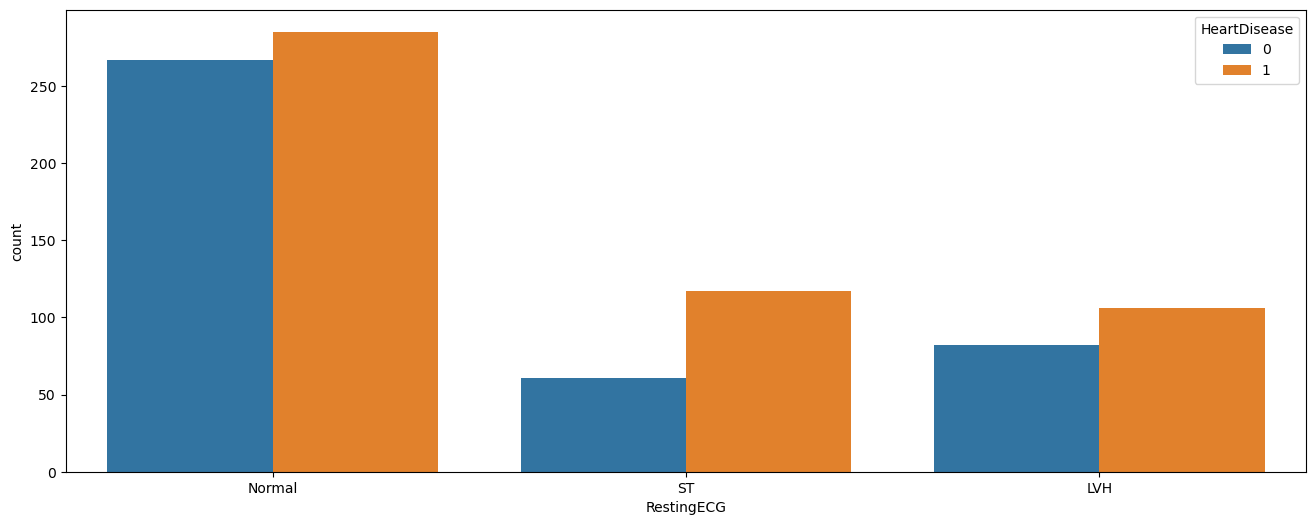

In [51]:
plt.figure(figsize=(16,6))
sns.countplot(df, x=df["RestingECG"],hue=df["HeartDisease"])

<Axes: xlabel='ExerciseAngina', ylabel='count'>

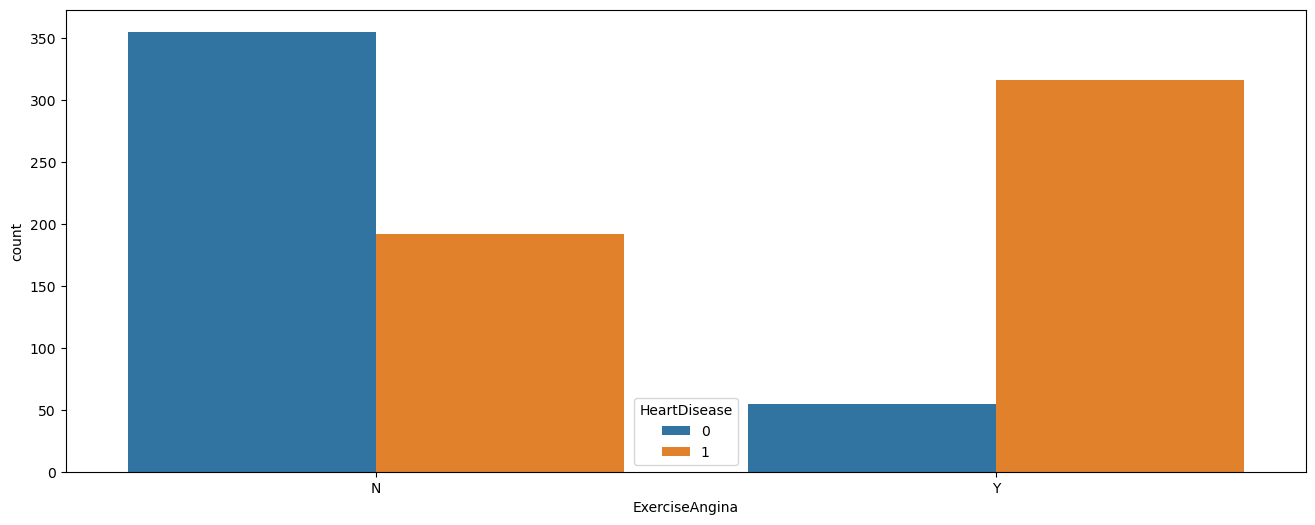

In [52]:
plt.figure(figsize=(16,6))
sns.countplot(df, x=df["ExerciseAngina"],hue=df["HeartDisease"])

In [89]:
df["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

<Axes: xlabel='ST_Slope', ylabel='count'>

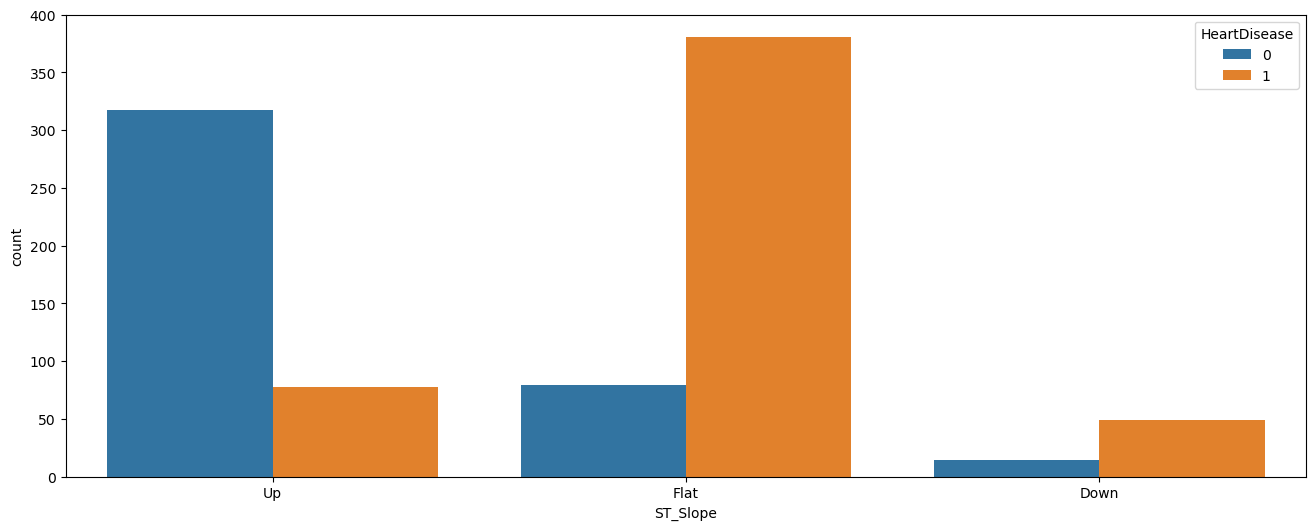

In [53]:
plt.figure(figsize=(16,6))
sns.countplot(df, x=df["ST_Slope"],hue=df["HeartDisease"])

In [85]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [99]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<Axes: xlabel='RestingBP', ylabel='count'>

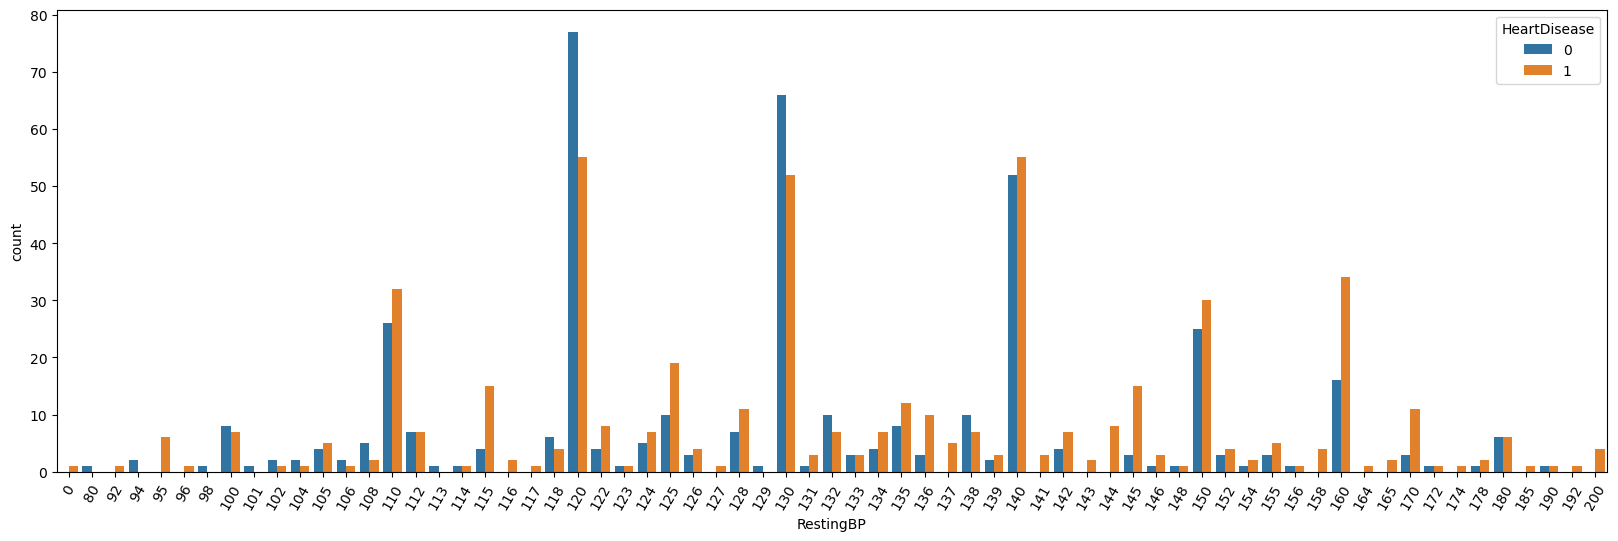

In [103]:
plt.figure(figsize=(20,6))
plt.xticks(rotation = 60)
sns.countplot(df, x=df["RestingBP"],hue=df["HeartDisease"])

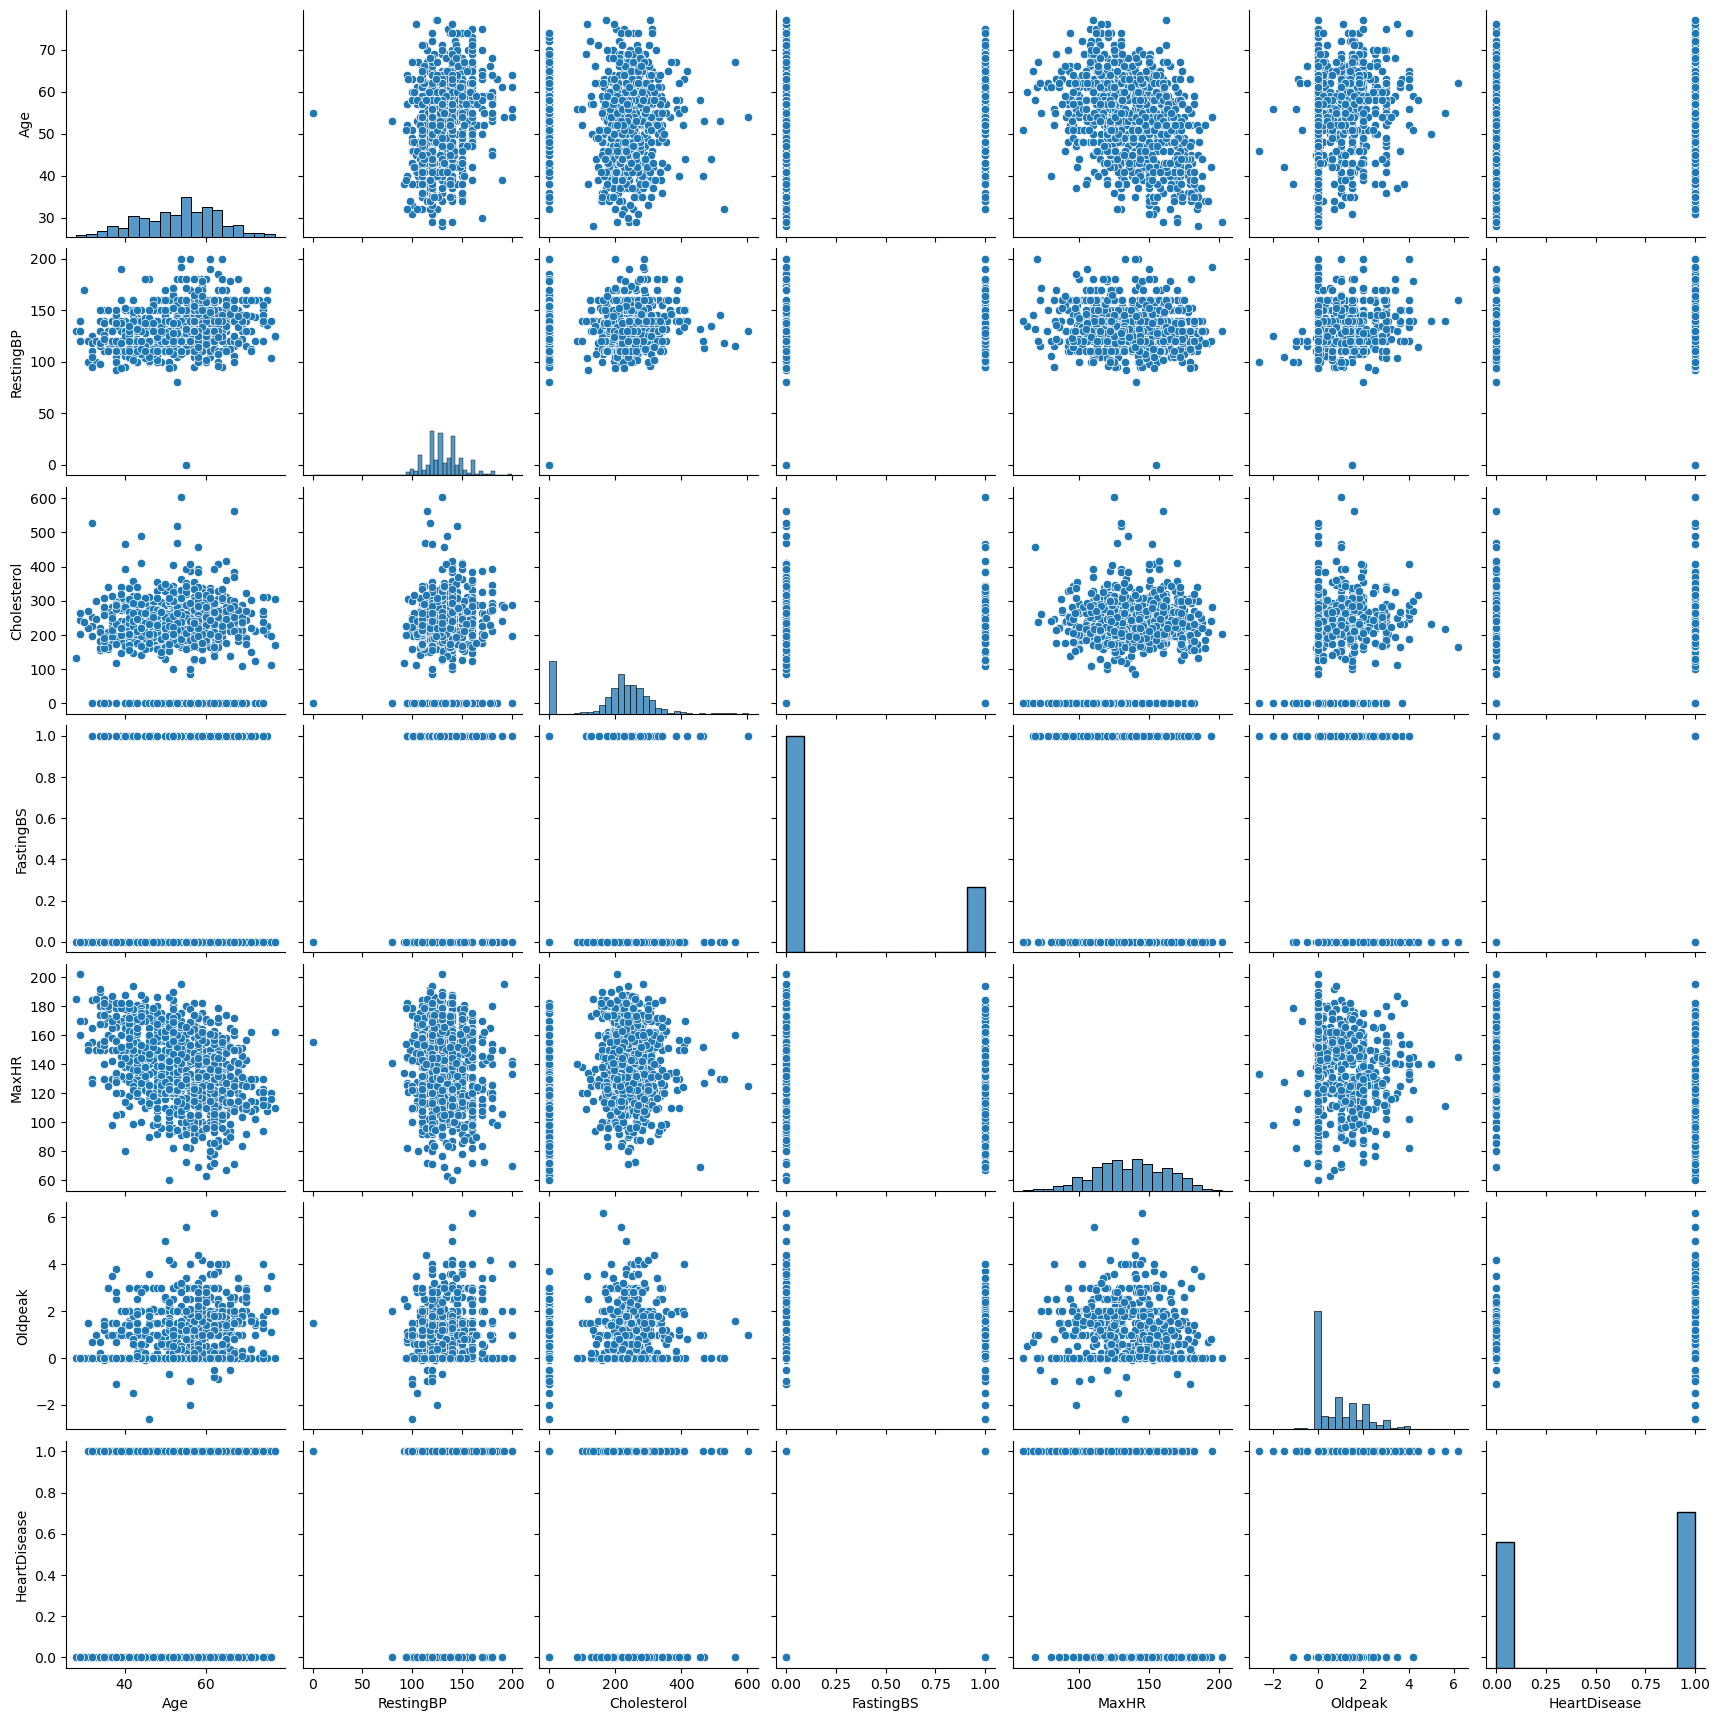

In [55]:
sns.pairplot(df)

In [60]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Dealing with categorical features

In [63]:
df.select_dtypes(include="object").columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [104]:
df = pd.get_dummies(df,columns=["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"],drop_first=True)

In [105]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [203]:
X = df.drop("HeartDisease",axis=1).values
y = df["HeartDisease"].values

In [204]:
X.shape

(918, 15)

In [205]:
y.shape

(918,)

In [263]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [208]:
print(f"X train shape: {X_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y train shape: {y_train.shape}")
print(f"y test shape: {y_test.shape}")


X train shape: (688, 15)
X test shape: (230, 15)
y train shape: (688,)
y test shape: (230,)


In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [210]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [220]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay

In [211]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [212]:
X_train_scaled

array([[ 1.096735  , -1.99368991, -1.81313034, ..., -0.82095428,
        -1.02651417, -0.85360601],
       [ 0.88496018, -0.66404794,  0.73141449, ..., -0.82095428,
         0.97417067, -0.85360601],
       [-1.65633764, -2.15324695, -0.75365794, ...,  1.21809462,
         0.97417067, -0.85360601],
       ...,
       [-0.27980132,  0.39966564, -1.81313034, ..., -0.82095428,
         0.97417067, -0.85360601],
       [ 1.20262241,  0.39966564,  1.96293797, ..., -0.82095428,
        -1.02651417,  1.17150066],
       [ 0.46141054,  0.93152243,  0.74952513, ..., -0.82095428,
        -1.02651417,  1.17150066]])

In [213]:
X_test_scaled

array([[ 0.67318536, -0.13219115,  0.47786554, ...,  1.21809462,
        -1.02651417,  1.17150066],
       [-1.97399987, -0.55767658, -0.07450896, ..., -0.82095428,
        -1.02651417,  1.17150066],
       [ 0.67318536, -0.13219115, -0.12884088, ...,  1.21809462,
         0.97417067, -0.85360601],
       ...,
       [-2.2916621 , -1.99368991, -1.81313034, ..., -0.82095428,
        -1.02651417,  1.17150066],
       [-0.38568873,  0.39966564,  0.29675915, ..., -0.82095428,
         0.97417067, -0.85360601],
       [-0.91512578, -0.92997633,  0.54125278, ..., -0.82095428,
        -1.02651417,  1.17150066]])


### Logistic Regression

In [257]:
lr = LogisticRegression(penalty="l2",C=0.01)
lr.fit(X_train_scaled,y_train)


LogisticRegression(C=0.01)

In [258]:
y_pred_lr = lr.predict(X_test_scaled)

In [259]:
y_pred_lr_train = lr.predict(X_train_scaled)

In [260]:
lr.classes_

array([0, 1])

In [261]:
cm = confusion_matrix(y_test,y_pred_lr,labels=lr.classes_)
print(cm)

[[ 89  20]
 [ 14 107]]


Model: Logistic Regression
Accuracy Train: 0.875
Accuracy Test: 0.8521739130434782
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.82      0.84       109
           1       0.84      0.88      0.86       121

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230



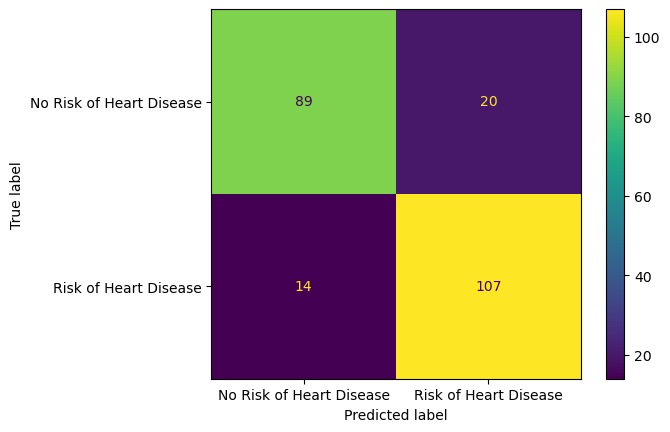

In [262]:

print("Model: Logistic Regression")
print(f"Accuracy Train: {accuracy_score(y_train,y_pred_lr_train)}")
print(f"Accuracy Test: {accuracy_score(y_test,y_pred_lr)}")
print(f"Classification Report: {classification_report(y_test,y_pred_lr)}")
cm = confusion_matrix(y_test,y_pred_lr,labels=lr.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["No Risk of Heart Disease","Risk of Heart Disease"])
cmd.plot()


### Random Forest Classification with GridSearchCV

In [264]:
n_estimators = [50,100,150,200]

max_samples = [0.25,0.5,0.75,1]

max_features = [0.25,0.5,0.75,1]

max_depth = [2,5,8,15]
max_samples = [0.25,0.5,0.75,1]

param_grid = {
    "n_estimators":n_estimators,
    "max_samples":max_samples,
    "max_depth":max_depth,
    "max_features":max_features
    
}

In [265]:
rf = RandomForestClassifier()

In [266]:
rf_grid = GridSearchCV(rf,param_grid=param_grid,n_jobs=-1)
rf_grid.fit(X_train_scaled,y_train)
rf_grid.best_params_

{'max_depth': 8, 'max_features': 1, 'max_samples': 0.75, 'n_estimators': 150}

In [267]:
rf_grid.best_score_

0.8822067068655454

In [279]:
rf_best = RandomForestClassifier(n_estimators=175,max_depth=8,max_features=1,max_samples=0.75,random_state=10)
rf_best.fit(X_train_scaled,y_train)
y_pred_rf = rf_best.predict(X_test_scaled)
y_pred_rf_train = rf_best.predict(X_train_scaled)

Model: Random Forest Classifier
Accuracy Train: 0.9375
Accuracy Test: 0.8652173913043478
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.83      0.85       109
           1       0.86      0.89      0.87       121

    accuracy                           0.87       230
   macro avg       0.87      0.86      0.86       230
weighted avg       0.87      0.87      0.86       230



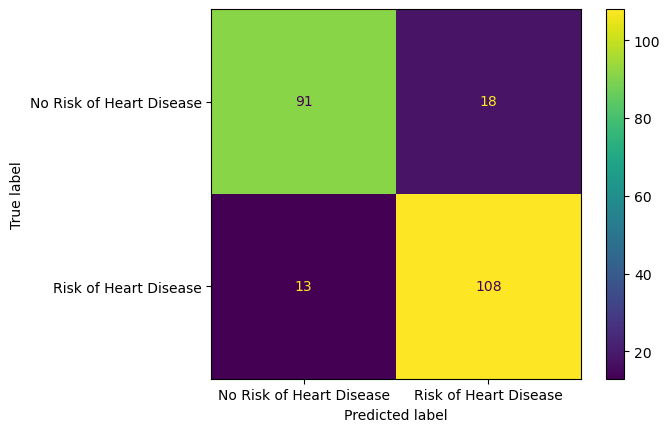

In [280]:

print("Model: Random Forest Classifier")
print(f"Accuracy Train: {accuracy_score(y_train,y_pred_rf_train)}")
print(f"Accuracy Test: {accuracy_score(y_test,y_pred_rf)}")
print(f"Classification Report: {classification_report(y_test,y_pred_rf)}")
cm = confusion_matrix(y_test,y_pred_rf,labels=lr.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["No Risk of Heart Disease","Risk of Heart Disease"])
cmd.plot()

In [285]:
n_estimators = [50,100,150,200]

max_depth = [2,5,8,15]

learning_rate = [0.1,0.01,0.001]

param_grid = {
    "n_estimators":n_estimators,
    
    "max_depth":max_depth,
    
    "learning_rate":learning_rate
    
}

In [286]:
xgb = XGBClassifier()

In [287]:
xgb_grid = GridSearchCV(xgb,param_grid=param_grid)

In [288]:
xgb_grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 5, 8, 15],
                         'n_estimators': [50, 100, 150, 200]})

In [289]:
xgb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}

In [290]:
xgb_grid.best_score_

0.877848302126309

In [294]:
xgb_best = XGBClassifier(learning_rate = 0.1,max_depth = 2, n_estimators = 50,random_state = 12)

In [295]:
xgb_best.fit(X_train_scaled,y_train)
y_pred_xgb = xgb_best.predict(X_test_scaled)
y_pred_xgb_train = xgb_best.predict(X_train_scaled)

Model: XGB Classifier
Accuracy Train: 0.8938953488372093
Accuracy Test: 0.8739130434782608
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.83      0.86       109
           1       0.85      0.92      0.88       121

    accuracy                           0.87       230
   macro avg       0.88      0.87      0.87       230
weighted avg       0.88      0.87      0.87       230



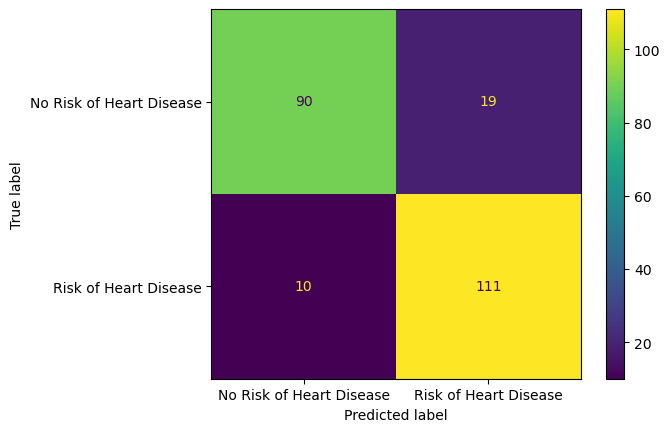

In [296]:

print("Model: XGB Classifier")
print(f"Accuracy Train: {accuracy_score(y_train,y_pred_xgb_train)}")
print(f"Accuracy Test: {accuracy_score(y_test,y_pred_xgb)}")
print(f"Classification Report: {classification_report(y_test,y_pred_xgb)}")
cm = confusion_matrix(y_test,y_pred_xgb,labels=lr.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["No Risk of Heart Disease","Risk of Heart Disease"])
cmd.plot()

### ANN

In [351]:
X_train_scaled.shape

(688, 15)

In [352]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [353]:
ann = Sequential()

ann.add(Dense(128,activation="relu",input_dim = 15,kernel_regularizer=l2(0.3)))
ann.add(Dropout(0.2))

ann.add(Dense(64,activation="relu",kernel_regularizer=l2(0.3)))
ann.add(Dropout(0.2))

ann.add(Dense(1,activation="sigmoid"))

In [363]:
callback = EarlyStopping(
    
    monitor="val_loss",
    patience=10


)

In [364]:
ann.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               2048      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10369 (40.50 KB)
Trainable params: 10369 (40.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [365]:
adam= Adam(learning_rate=0.01)

In [366]:
ann.compile(loss="binary_crossentropy",optimizer=adam,metrics=["accuracy"])

In [367]:
ann.fit(X_train_scaled,y_train,epochs=200,validation_split=0.2,callbacks=callback)

Epoch 1/200
18/18 [==============================] - 0s 5ms/step - loss: 0.5766 - accuracy: 0.8545 - val_loss: 0.5826 - val_accuracy: 0.8188
Epoch 2/200
18/18 [==============================] - 0s 1ms/step - loss: 0.5321 - accuracy: 0.8436 - val_loss: 0.6030 - val_accuracy: 0.8116
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.8709 - val_loss: 0.5701 - val_accuracy: 0.8261
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.8655 - val_loss: 0.6176 - val_accuracy: 0.8188
Epoch 5/200
18/18 [==============================] - 0s 1ms/step - loss: 0.5033 - accuracy: 0.8491 - val_loss: 0.5912 - val_accuracy: 0.8188
Epoch 6/200
18/18 [==============================] - 0s 1ms/step - loss: 0.5247 - accuracy: 0.8527 - val_loss: 0.5613 - val_accuracy: 0.8116
Epoch 7/200
18/18 [==============================] - 0s 1ms/step - loss: 0.5409 - accuracy: 0.8436 - val_loss: 0.5401 - val_accuracy: 0.8478
Epoch 8/200
1

In [368]:
y_log = ann.predict(X_test_scaled)

8/8 [==============================] - 0s 518us/step


In [369]:
y_log_train = ann.predict(X_train_scaled)
y_pred_ann_train = np.where(y_log_train>= 0.5,1,0)

22/22 [==============================] - 0s 450us/step


In [370]:
y_pred_ann = np.where(y_log>= 0.5,1,0)

Model: ANN
Accuracy Train: 0.8648255813953488
Accuracy Test: 0.8565217391304348
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.83      0.85       109
           1       0.85      0.88      0.87       121

    accuracy                           0.86       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



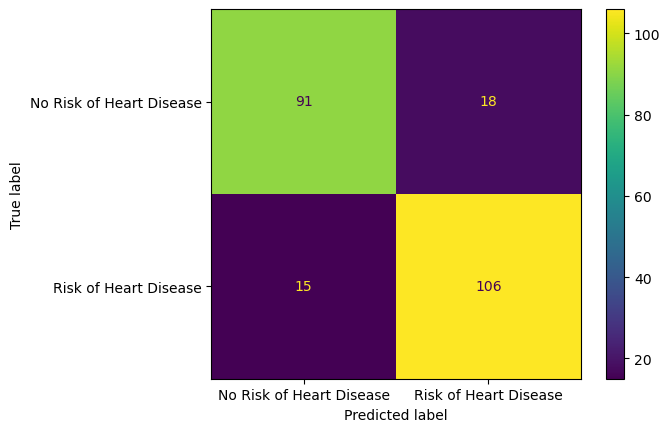

In [371]:

print("Model: ANN")
print(f"Accuracy Train: {accuracy_score(y_train,y_pred_ann_train)}")
print(f"Accuracy Test: {accuracy_score(y_test,y_pred_ann)}")
print(f"Classification Report: {classification_report(y_test,y_pred_ann)}")
cm = confusion_matrix(y_test,y_pred_ann,labels=lr.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["No Risk of Heart Disease","Risk of Heart Disease"])
cmd.plot()